In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_train = pd.read_csv('train.csv')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57477 entries, 0 to 57476
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              57477 non-null  int64 
 1   model_a         57477 non-null  object
 2   model_b         57477 non-null  object
 3   prompt          57477 non-null  object
 4   response_a      57477 non-null  object
 5   response_b      57477 non-null  object
 6   winner_model_a  57477 non-null  int64 
 7   winner_model_b  57477 non-null  int64 
 8   winner_tie      57477 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.9+ MB


In [13]:
df_train.head()
df_train.drop(['model_a','model_b'],axis=1)

,id,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0
...,...,...,...,...,...,...,...
57472,4294656694,"[""A simple mnemonic for \u03c0:\n\""How I wish ...","[""Sure, let's break it down:\n\n1. \""How\"" has...","[""Here is how that mnemonic represents the dig...",1,0,0
57473,4294692063,"[""In python, implement a naive Bayes with gaus...","[""Here is an implementation of a naive Bayes c...","[""Sure! Here's an implementation of a naive Ba...",1,0,0
57474,4294710549,"[""is it unethical to work on building weapons?...","[""Working on weapons technology raises some et...","[""It depends on the context. Weapons can be us...",1,0,0
57475,4294899228,"[""If a bait contains 0,0025% bromadiolon then ...","[""Bromadiolone is a rodenticide which is most ...","[""As an AI language model, I do not promote or...",0,1,0


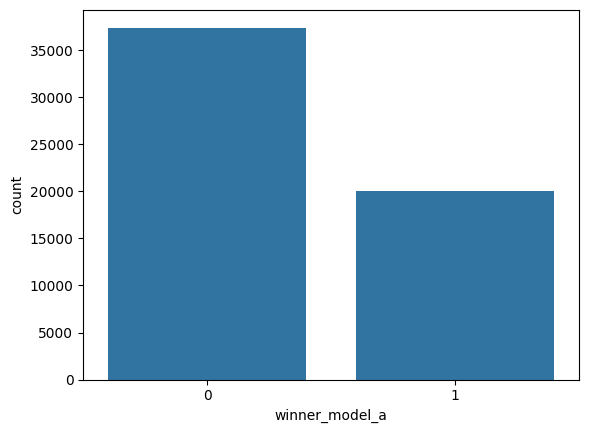

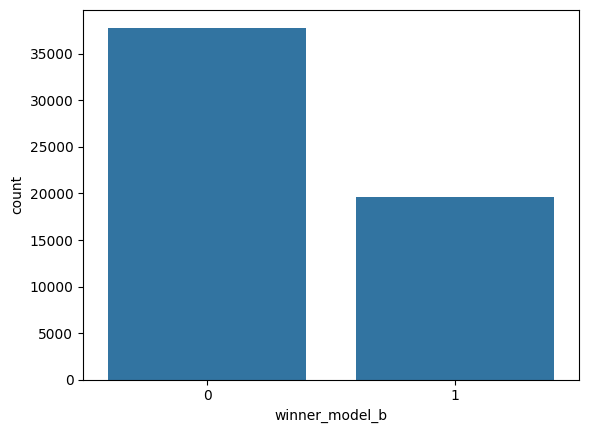

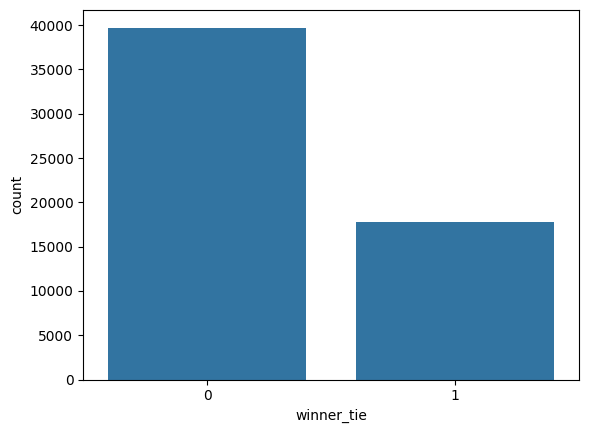

In [16]:

# Distribution of winner_model
sns.countplot(data=df_train, x='winner_model_a')
plt.show()

sns.countplot(data=df_train, x='winner_model_b')
plt.show()

sns.countplot(data=df_train, x='winner_tie')
plt.show()

In [48]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
train_data = pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')

# Cleaning the dataset

### Handle case of intput file and removing unwanted elements 

In [50]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

train_data['prompt'] = train_data['prompt'].apply(clean_text)
train_data['response_a'] = train_data['response_a'].apply(clean_text)
train_data['response_b'] = train_data['response_b'].apply(clean_text)

test_data['prompt'] = test_data['prompt'].apply(clean_text)
test_data['response_a'] = test_data['response_a'].apply(clean_text)
test_data['response_b'] = test_data['response_b'].apply(clean_text)

### Remove Stop Words :

"Remove stop words" refers to the process of eliminating common words from text data that do not carry significant meaning for analysis or modeling. These words (e.g., "and," "the," "is," "in") are frequently used and do not provide useful information about the content of the text.

In [51]:
# nltk.download('stopwords')
# nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
train_data['prompt'] = train_data['prompt'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
train_data['response_a'] = train_data['response_a'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
train_data['response_b'] = train_data['response_b'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

test_data['prompt'] = test_data['prompt'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
test_data['response_a'] = test_data['response_a'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
test_data['response_b'] = test_data['response_b'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

### Sentiment Analysis

"Sentiment Analysis" is a technique used in natural language processing (NLP) to determine the emotional tone behind a body of text. It helps to understand the sentiment expressed in the text, categorizing it as positive, negative, or neutral.

1. **Text Cleaning**: Prepare the text by removing noise, such as punctuation and stop words.
2. **Tokenization**: Split the text into individual words or tokens.
3. **Sentiment Scoring**: Use sentiment lexicons or pre-trained models to assign sentiment scores to the text.
4. **Aggregation**: Combine the scores to determine the overall sentiment of the text.

In [52]:
train_data['prompt_sentiment'] = train_data['prompt'].apply(lambda x: TextBlob(x).sentiment.polarity)
train_data['response_a_sentiment'] = train_data['response_a'].apply(lambda x: TextBlob(x).sentiment.polarity)
train_data['response_b_sentiment'] = train_data['response_b'].apply(lambda x: TextBlob(x).sentiment.polarity)

test_data['prompt_sentiment'] = test_data['prompt'].apply(lambda x: TextBlob(x).sentiment.polarity)
test_data['response_a_sentiment'] = test_data['response_a'].apply(lambda x: TextBlob(x).sentiment.polarity)
test_data['response_b_sentiment'] = test_data['response_b'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [53]:
# Response Length
train_data['prompt_length'] = train_data['prompt'].apply(lambda x: len(x.split()))
train_data['response_a_length'] = train_data['response_a'].apply(lambda x: len(x.split()))
train_data['response_b_length'] = train_data['response_b'].apply(lambda x: len(x.split()))

test_data['prompt_length'] = test_data['prompt'].apply(lambda x: len(x.split()))
test_data['response_a_length'] = test_data['response_a'].apply(lambda x: len(x.split()))
test_data['response_b_length'] = test_data['response_b'].apply(lambda x: len(x.split()))


### TF-IDF Vectorization

TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus). It combines two measures:

- **Term Frequency (TF)**: The number of times a term appears in a document.
- **Inverse Document Frequency (IDF)**: The logarithmically scaled inverse fraction of the documents that contain the term.

#### Steps:

1. **Compute TF**: Calculate the frequency of each term in each document.
2. **Compute IDF**: Calculate the IDF for each term across the entire corpus.
3. **Calculate TF-IDF**: Multiply the TF and IDF values for each term.

In [54]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=10000)
X_prompt_train = tfidf.fit_transform(train_data['prompt'])
X_response_a_train = tfidf.fit_transform(train_data['response_a'])
X_response_b_train = tfidf.fit_transform(train_data['response_b'])

X_prompt_test = tfidf.transform(test_data['prompt'])
X_response_a_test = tfidf.transform(test_data['response_a'])
X_response_b_test = tfidf.transform(test_data['response_b'])

## Combine Features

In [ ]:

X_train_combined = np.hstack((X_prompt_train.toarray(), X_response_a_train.toarray(), X_response_b_train.toarray(),
                              train_data[['prompt_sentiment', 'response_a_sentiment', 'response_b_sentiment',
                                          'prompt_length', 'response_a_length', 'response_b_length']].values))

X_test_combined = np.hstack((X_prompt_test.toarray(), X_response_a_test.toarray(), X_response_b_test.toarray(),
                             test_data[['prompt_sentiment', 'response_a_sentiment', 'response_b_sentiment',
                                        'prompt_length', 'response_a_length', 'response_b_length']].values))


## Preparing Target Variable and Split the Train Data



In [57]:
y_train = train_data[['winner_model_a', 'winner_model_b', 'winner_tie']].values

X_train, X_val, y_train, y_val = train_test_split(X_train_combined, y_train, test_size=0.2, random_state=42)


## Standard Scaling

In [58]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test_combined)